In [ ]:
# GPU

#!pip3 install tensorflow-gpu==1.14
#!pip3 install keras==2.0.8

In [ ]:
!pip3 uninstall tensorflow-gpu==1.14
!pip3 install tensorflow==1.13.1


     |████████████████████████████████| 92.5MB 44kB/s 
     |████████████████████████████████| 368kB 40.9MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 3.2MB 36.0MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
!pip3 install keras==2.2.4

     |████████████████████████████████| 317kB 8.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import csv
from sklearn.model_selection import train_test_split
import numpy
import keras
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from keras.models import model_from_json
from numpy import loadtxt
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import seaborn as sns
import tensorflow as tf
sns.set()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [ ]:
# shuffled data

In [ ]:
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_2.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
# shuffled data
visible = Input(shape=(23,))


c1 = Dense(23,activation='relu')(visible)
c2 = Dense(16,activation='relu')(c1)
s1 = Dense(1,activation='sigmoid')(c2)
s2 = Dense(1,activation='sigmoid')(c2)
s3 = Dense(1,activation='sigmoid')(c2)
s4 = Dense(1,activation='sigmoid')(c2)
s5 = Dense(1,activation='sigmoid')(c2)
s6 = Dense(1,activation='sigmoid')(c2)
s7 = Dense(1,activation='sigmoid')(c2)

model = Model(inputs=visible,outputs=[s1,s2,s3,s4,s5,s6,s7])
#opt = keras.optimizers.Adam(learning_rate=0.001)
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
history=model.fit(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], validation_split=0.2, epochs=3, batch_size=128)
print(model.summary())
model.save("/content/drive/MyDrive/sample_d1.h5")
print("Saved model to disk")

Instructions for updating:
Use tf.cast instead.
Train on 167772 samples, validate on 41943 samples
Epoch 1/3
167772/167772 [==============================] - 6s 35us/step - loss: 3.9953 - dense_3_loss: 0.5723 - dense_4_loss: 0.5210 - dense_5_loss: 0.6769 - dense_6_loss: 0.5957 - dense_7_loss: 0.5645 - dense_8_loss: 0.4509 - dense_9_loss: 0.6139 - dense_3_acc: 0.6549 - dense_4_acc: 0.9259 - dense_5_acc: 0.5339 - dense_6_acc: 0.7201 - dense_7_acc: 0.7525 - dense_8_acc: 0.8471 - dense_9_acc: 0.6898 - val_loss: 3.1017 - val_dense_3_loss: 0.4923 - val_dense_4_loss: 0.3264 - val_dense_5_loss: 0.4529 - val_dense_6_loss: 0.4292 - val_dense_7_loss: 0.4423 - val_dense_8_loss: 0.4251 - val_dense_9_loss: 0.5334 - val_dense_3_acc: 0.6807 - val_dense_4_acc: 0.9684 - val_dense_5_acc: 0.8354 - val_dense_6_acc: 0.8873 - val_dense_7_acc: 0.7868 - val_dense_8_acc: 0.8465 - val_dense_9_acc: 0.8025
Epoch 2/3
167772/167772 [==============================] - 4s 27us/step - loss: 2.3629 - dense_3_loss: 0.3499

In [ ]:
# data 2
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/sample_d1.h5')
history=model.fit(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], validation_split=0.2, epochs=1, batch_size=128)
print(model.summary())
model.save("/content/drive/MyDrive/sample_d2.h5")
print("Saved model to disk")

Train on 167772 samples, validate on 41943 samples
Epoch 1/1
167772/167772 [==============================] - 11s 68us/step - loss: 2.1070 - dense_111_loss: 0.2928 - dense_112_loss: 0.2707 - dense_113_loss: 0.1833 - dense_114_loss: 0.2152 - dense_115_loss: 0.3601 - dense_116_loss: 0.3889 - dense_117_loss: 0.3960 - dense_111_acc: 0.9290 - dense_112_acc: 0.9686 - dense_113_acc: 0.9721 - dense_114_acc: 0.9798 - dense_115_acc: 0.8208 - dense_116_acc: 0.8423 - dense_117_acc: 0.8378 - val_loss: 1.5492 - val_dense_111_loss: 0.1644 - val_dense_112_loss: 0.1666 - val_dense_113_loss: 0.1071 - val_dense_114_loss: 0.1212 - val_dense_115_loss: 0.2864 - val_dense_116_loss: 0.3875 - val_dense_117_loss: 0.3159 - val_dense_111_acc: 0.9784 - val_dense_112_acc: 0.9694 - val_dense_113_acc: 0.9902 - val_dense_114_acc: 0.9862 - val_dense_115_acc: 0.8643 - val_dense_116_acc: 0.8382 - val_dense_117_acc: 0.8817
__________________________________________________________________________________________________
L

In [ ]:
# data 3
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_3.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/shuffled_model_d2.h5')
history=model.fit(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], validation_split=0.2, epochs=1, batch_size=128)
print(model.summary())
model.save("/content/drive/MyDrive/sample_d3.h5")
print("Saved model to disk")

Train on 167772 samples, validate on 41943 samples
Epoch 1/1
167772/167772 [==============================] - 11s 66us/step - loss: 0.1243 - dense_42_loss: 0.0048 - dense_43_loss: 0.0183 - dense_44_loss: 0.0051 - dense_45_loss: 0.0135 - dense_46_loss: 0.0125 - dense_47_loss: 0.0403 - dense_48_loss: 0.0297 - dense_42_acc: 0.9992 - dense_43_acc: 0.9936 - dense_44_acc: 0.9994 - dense_45_acc: 0.9931 - dense_46_acc: 0.9942 - dense_47_acc: 0.9843 - dense_48_acc: 0.9889 - val_loss: 0.1196 - val_dense_42_loss: 0.0042 - val_dense_43_loss: 0.0190 - val_dense_44_loss: 0.0046 - val_dense_45_loss: 0.0137 - val_dense_46_loss: 0.0135 - val_dense_47_loss: 0.0379 - val_dense_48_loss: 0.0268 - val_dense_42_acc: 0.9990 - val_dense_43_acc: 0.9862 - val_dense_44_acc: 0.9994 - val_dense_45_acc: 0.9925 - val_dense_46_acc: 0.9932 - val_dense_47_acc: 0.9893 - val_dense_48_acc: 0.9922
__________________________________________________________________________________________________
Layer (type)                 

In [ ]:
# data 4
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_4.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/shuffled_model_d3.h5')
history=model.fit(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], validation_split=0.2, epochs=3, batch_size=128)
print(model.summary())
model.save("/content/drive/MyDrive/sample_d4.h5")
print("Saved model to disk")

Train on 167772 samples, validate on 41943 samples
Epoch 1/3
167772/167772 [==============================] - 9s 56us/step - loss: 0.0595 - dense_42_loss: 0.0025 - dense_43_loss: 0.0120 - dense_44_loss: 0.0011 - dense_45_loss: 0.0057 - dense_46_loss: 0.0100 - dense_47_loss: 0.0168 - dense_48_loss: 0.0114 - dense_42_acc: 0.9996 - dense_43_acc: 0.9980 - dense_44_acc: 1.0000 - dense_45_acc: 0.9992 - dense_46_acc: 0.9958 - dense_47_acc: 0.9965 - dense_48_acc: 0.9984 - val_loss: 0.0532 - val_dense_42_loss: 0.0028 - val_dense_43_loss: 0.0108 - val_dense_44_loss: 9.6480e-04 - val_dense_45_loss: 0.0045 - val_dense_46_loss: 0.0096 - val_dense_47_loss: 0.0146 - val_dense_48_loss: 0.0099 - val_dense_42_acc: 0.9992 - val_dense_43_acc: 0.9990 - val_dense_44_acc: 1.0000 - val_dense_45_acc: 0.9996 - val_dense_46_acc: 0.9942 - val_dense_47_acc: 0.9971 - val_dense_48_acc: 0.9979
Epoch 2/3
167772/167772 [==============================] - 5s 32us/step - loss: 0.0515 - dense_42_loss: 0.0020 - dense_43_los

In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    Y1.append(Yd[i][0])
    Y2.append(Yd[i][1])
    Y3.append(Yd[i][2])
    Y4.append(Yd[i][3])
    Y5.append(Yd[i][4])
    Y6.append(Yd[i][5])
    Y7.append(Yd[i][6])
Xout = numpy.array(X)
Y1 = numpy.array(Y1)
Y2 = numpy.array(Y2)
Y3 = numpy.array(Y3)
Y4 = numpy.array(Y4)
Y5 = numpy.array(Y5)
Y6 = numpy.array(Y6)
Y7 = numpy.array(Y7)
print(Xout.shape)

(209715, 23)


In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/sample_d1.h5')
score = loaded_model.evaluate(Xout, y=[Y1,Y2,Y3,Y4,Y5,Y6,Y7], verbose=0)
for i in range(0,len(score)):
    print("%s: %.2f%%" % (loaded_model.metrics_names[i], score[i]*100))

predicted = loaded_model.predict(Xout)
p_classes = numpy.argmax(predicted,axis=1)

loss: 118.38%
dense_3_loss: 9.20%
dense_4_loss: 10.41%
dense_5_loss: 7.34%
dense_6_loss: 7.28%
dense_7_loss: 19.60%
dense_8_loss: 37.84%
dense_9_loss: 26.71%
dense_3_acc: 97.87%
dense_4_acc: 96.92%
dense_5_acc: 99.06%
dense_6_acc: 98.58%
dense_7_acc: 95.07%
dense_8_acc: 84.63%
dense_9_acc: 87.58%


In [ ]:
p = []

for x in numpy.nditer(predicted):
    xi = []
    for i in range(0,7):

        if x[i] < float(0.5):
            xi.append(0.0)
        else:
            xi.append(1.0)
    p.append(xi)

count = 0
for i in range(0,len(Yd)):
    v = 1
    for j in range(0,len(Yd[i])):
        if Yd[i][j]!=p[i][j]:
            v = 0
            break
    if v==1:
        count+=1

print(count)
print((count/len(Yd))*100)

#print(history.history.keys())


139585
66.55937820375271


summarize history for dense_3 layer


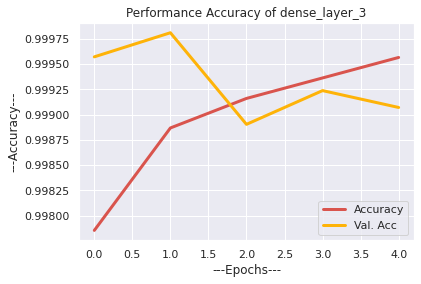

In [ ]:
%matplotlib inline
print("summarize history for dense_3 layer")
# accuracy
plt.plot(history.history['dense_43_acc'],sns.xkcd_rgb["pale red"],label="Accuracy", lw=3)
plt.plot(history.history['val_dense_43_acc'],sns.xkcd_rgb["amber"], label="Val. Acc", lw=3)
#plt.yticks(numpy.arange(ymin, ymax, 0.005))
plt.title('Performance Accuracy of dense_layer_3')
plt.ylabel('---Accuracy---')
plt.xlabel('---Epochs---')
plt.legend()
plt.savefig('/content/drive/MyDrive/dense_3_acc.png')
plt.show()

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np


In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/sample_d1.h5')

loss


Accuracy: 0.978743
Precision: 0.978743
Recall: 0.978743
F1 score: 0.978743
Cohens kappa: 0.952313
[[ 68024   4458]
 [     0 137233]]
Predicted    0.0     1.0     All
Actual                          
0.0        68024    4458   72482
1.0            0  137233  137233
All        68024  141691  209715







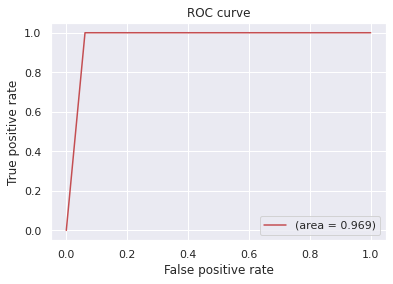

dense_3_loss


Accuracy: 0.969201
Precision: 0.969201
Recall: 0.969201
F1 score: 0.969201
Cohens kappa: 0.938434
[[103818      0]
 [  6459  99438]]
Predicted     0.0    1.0     All
Actual                          
0.0        103818      0  103818
1.0          6459  99438  105897
All        110277  99438  209715







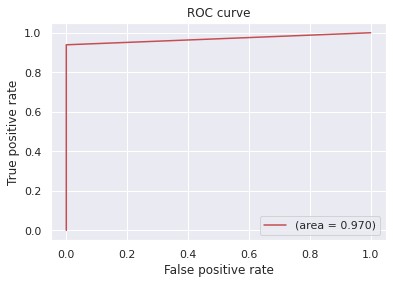

dense_4_loss


Accuracy: 0.990649
Precision: 0.990649
Recall: 0.990649
F1 score: 0.990649
Cohens kappa: 0.974220
[[158822    990]
 [   971  48932]]
Predicted     0.0    1.0     All
Actual                          
0.0        158822    990  159812
1.0           971  48932   49903
All        159793  49922  209715







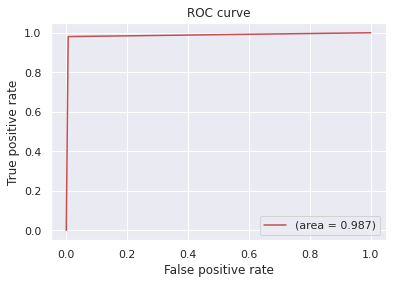

dense_5_loss


Accuracy: 0.985828
Precision: 0.985828
Recall: 0.985828
F1 score: 0.985828
Cohens kappa: 0.971052
[[118603   2972]
 [     0  88140]]
Predicted     0.0    1.0     All
Actual                          
0.0        118603   2972  121575
1.0             0  88140   88140
All        118603  91112  209715







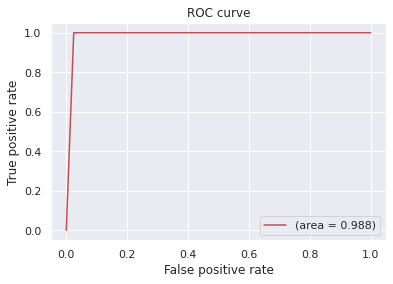

dense_6_loss


Accuracy: 0.950700
Precision: 0.950700
Recall: 0.950700
F1 score: 0.950700
Cohens kappa: 0.843385
[[163573   2273]
 [  8066  35803]]
Predicted     0.0    1.0     All
Actual                          
0.0        163573   2273  165846
1.0          8066  35803   43869
All        171639  38076  209715







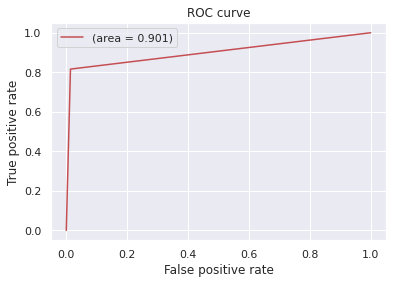

dense_7_loss


Accuracy: 0.846339
Precision: 0.846339
Recall: 0.846339
F1 score: 0.846339
Cohens kappa: 0.000000
[[177490      0]
 [ 32225      0]]
Predicted     0.0     All
Actual                   
0.0        177490  177490
1.0         32225   32225
All        209715  209715







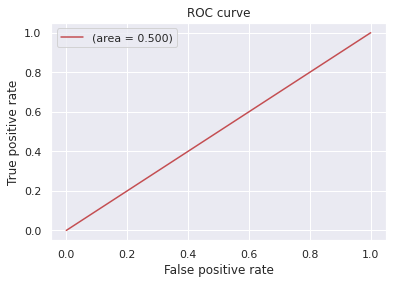

dense_8_loss


Accuracy: 0.875755
Precision: 0.875755
Recall: 0.875755
F1 score: 0.875755
Cohens kappa: 0.750390
[[98988 14401]
 [11655 84671]]
Predicted     0.0    1.0     All
Actual                          
0.0         98988  14401  113389
1.0         11655  84671   96326
All        110643  99072  209715







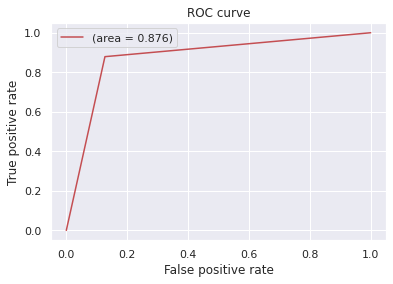

In [ ]:
%matplotlib inline

for j in range(0,7):
    Yt_1=[]
    p_1=[]    
    
    for i in range(0,len(Yd)):
        Yt_1.append(Yd[i][j])
        if(p[i][j]<0.5):
          p_1.append(0.0)
        else:
          p_1.append(1.0)
        # p_1.append(np.argmax(p[i][j],axis=1))

    
    # plt.scatter(Yt_1,p_1)
    # plt.xlabel("True")
    # plt.ylabel("Predict")
    # print(Yt_1)
    # print(p_1)
    print(loaded_model.metrics_names[j])
    print("\n")
    accuracy = accuracy_score(Yt_1, p_1)
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(Yt_1, p_1, average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(Yt_1, p_1, average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(Yt_1, p_1, average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(Yt_1, p_1)
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(Yt_1,p_1)
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label="(area = {:.3f})".format(auc_rf),color='r')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(Yt_1, p_1)
    print(matrix)

    exp_series = pd.Series(Yt_1)
    pred_series = pd.Series(p_1)
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    